# **Global Super Store - Sales Performance Analysis and Customer Segmentation**

### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Load Dataset**

In [ ]:
# import dataset global superstore
df = pd.read_csv('/content/Global_Superstore2.csv', encoding = 'ISO-8859-1')
pd.set_option('display.max_column', None)

In [ ]:
# menampilkan 5 baris pertama dari data global superstore
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
# df.shape()

print(f'Row : {df.shape[0]}\nColumn : {df.shape[1]}')

Row : 51290
Column : 24


dataset global superstore memiliki **51290 baris** dan **24 kolom**

In [ ]:
# menampilkan statistik deskriptif
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
# menampilkan info dari data global superstore
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

## **Data Cleaning**

In [ ]:
# cek tipe data
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

terdapat kesalahan tipe data pada beberapa kolom, yaitu:
- 'Order Date' dan 'Ship Date' tipe datanya berupa **object** seharusnya **date time**
- 'Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority' memiliki tipe data **object** seharusnya adalah **category**
- 'Row ID' memiliki tipe data int seharusnya adalah **object**

In [ ]:
# mengubah tipe data menjadi datetime 
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst = True)

In [ ]:
# cek kembali tipe data
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode               category
Customer ID               object
Customer Name             object
Segment                 category
City                    category
State                   category
Country                 category
Postal Code              float64
Market                  category
Region                  category
Product ID                object
Category                category
Sub-Category            category
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority          category
dtype: object

Tipe data sudah berhasil diubah

In [ ]:
# cek missing value
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

terdapat **missing values** pada kolom **Postal Code** sebanyak **41296** nilai null. Lakukan penghapusan untuk kolom Postal Kode karena memiliki missing value lebih dari 80%.

In [ ]:
# handling missing value
df.drop(columns = 'Postal Code', axis=1, inplace=True)

In [ ]:
# cek kembali missing value
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

missing value sudah tidak ada dan kolom Postal Code sudah dihapus

In [ ]:
# cek data duplikat
df.duplicated().sum()

0

tidak terdapat data duplikat

In [ ]:
# cek nilai unik pada data
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [ ]:
# irrelevant column
df.drop(columns = 'Row ID', axis=1, inplace=True)

In [ ]:
df.groupby(['Customer ID', 'Customer Name'])['Customer ID'].unique()

Customer ID  Customer Name     
AA-10315     Alex Avila            [AA-10315]
AA-10375     Allen Armold          [AA-10375]
AA-10480     Andrew Allen          [AA-10480]
AA-10645     Anna Andreadi         [AA-10645]
AA-315       Alex Avila              [AA-315]
                                      ...    
YS-21880     Yana Sorensen         [YS-21880]
ZC-11910     Zuschuss Carroll      [ZC-11910]
ZC-21910     Zuschuss Carroll      [ZC-21910]
ZD-11925     Zuschuss Donatelli    [ZD-11925]
ZD-21925     Zuschuss Donatelli    [ZD-21925]
Name: Customer ID, Length: 1590, dtype: object

**Membuat kolom baru berupa Profit Margin dan Shipping Time**

**Profit Margin** adalah **persentase** yang menggambarkan **keuntungan/kerugian** yang dihasilkan perusahaan. 


*   **Rumus :**
*   Profit Margin = (Profit/Sales)*100

**Shipping Time** adalah estimasi waktu pengiriman.
*   **Rumus :**
*   Shipping Time = Ship Date - Order Date

In [ ]:
# membuat kolom baru berupa Profit Margin (%) 
df['Profit Margin %'] = round((df['Profit']/df['Sales'])*100, 2)
df['Shipping Time'] = df['Ship Date'] - df['Order Date']

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Profit Margin %,Shipping Time
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,33.00,0 days
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,-7.78,2 days
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,17.78,1 days
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,-3.34,2 days
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,11.00,1 days


In [ ]:
# statistik deskriptif kolom numeric
df.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost,Profit Margin %,Shipping Time
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
mean,246.490581,3.476545,0.142908,28.610982,26.375915,4.743049,3 days 23:15:53.589393644
std,487.565361,2.278766,0.212280,174.340972,57.296804,46.566723,1 days 17:30:23.320880732
min,0.444000,1.000000,0.000000,-6599.978000,0.000000,-473.350000,0 days 00:00:00
25%,30.758625,2.000000,0.000000,0.000000,2.610000,0.000000,3 days 00:00:00
50%,85.053000,3.000000,0.000000,9.240000,7.790000,16.920000,4 days 00:00:00
75%,251.053200,5.000000,0.200000,36.810000,24.450000,33.310000,5 days 00:00:00
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,50.000000,7 days 00:00:00


dari statatistik diatas diketahui bahwa :

* total penjualan terbesar yaitu sekitar $22638

* profit terbesar yang dihasilkan mencapai $8399, sedangkan kerugian terbesarnya mencapai 6599 dolar/pesanan.
* 75% pesanan menghasilkan setidaknya 33% margin keuntungan.
* Kerugian dari pesanan bisa naik hingga 473%. 

oleh karena itu kita harus mencari tau apa yang membuat kerugian itu terjadi dan bagaimana rekomendasi kita untuk membuat hal tersebut tidak terjadi ataupun menekan kerugian tersebut.

In [ ]:
# deskripsi kolom kategori
df.describe(include='category')

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,4,3,3636,1094,147,7,13,3,17,4
top,Standard Class,Consumer,New York City,California,United States,APAC,Central,Office Supplies,Binders,Medium
freq,30775,26518,915,2001,9994,11002,11117,31273,6152,29433


dari kolom categorycal diketahui bahwa:

* Ada 4 jenis pengiriman dan 3 segmen pelanggan. Lebih dari setengah pesanan berasal dari segmen Consumer yang menggunakan pengiriman Standard Class.

* Toko menyediakan 3 kategori barang dengan 17 subkategori. sekitar 60% pesanan adalah untuk Office Supplies (Perlengkapan Kantor) dan setidaknya 11% pembeliannya adalah Binder.

In [ ]:
# deskripsi kolom datetime
df.describe(include='datetime')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Order Date,Ship Date
count,51290,51290
unique,1430,1464
top,2014-06-18 00:00:00,2014-11-22 00:00:00
freq,135,130
first,2011-01-01 00:00:00,2011-01-03 00:00:00
last,2014-12-31 00:00:00,2015-01-07 00:00:00


* first Order Date: 01 Januari 2011
  
  Last Order Date: 31 Desember 2014

* First Ship Date: 03 Januari 2011

  Last Ship Date: 07 Januari 2015

In [ ]:
df.describe(include='object')

,Order ID,Customer ID,Customer Name,Product ID,Product Name
count,51290,51290,51290,51290,51290
unique,25035,1590,795,10292,3788
top,CA-2014-100111,PO-18850,Muhammed Yedwab,OFF-AR-10003651,Staples
freq,14,97,108,35,227


## **Exploratory Data Analysis (EDA)**

**HISTOGRAM :** Melihat distribusi data

* Dari histogram di atas, kita dapat melihat bahwa features seperti Sales, Profit, Shipping Cost dikelompokkan dalam wilayah yang sempit. Sementara Quantity memiliki distribusi data miring kanan terjadi karena untuk Quantity yg besar hanya memiliki sedikit pesanan. 

* Banyak produk yang memiliki Profit Margin negatif karena mengikuti distribusi miring kiri, di sebagian besar kasus juga tidak ada diskon yang diberikan pada produk.

In [ ]:
col = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Sub-Category']]

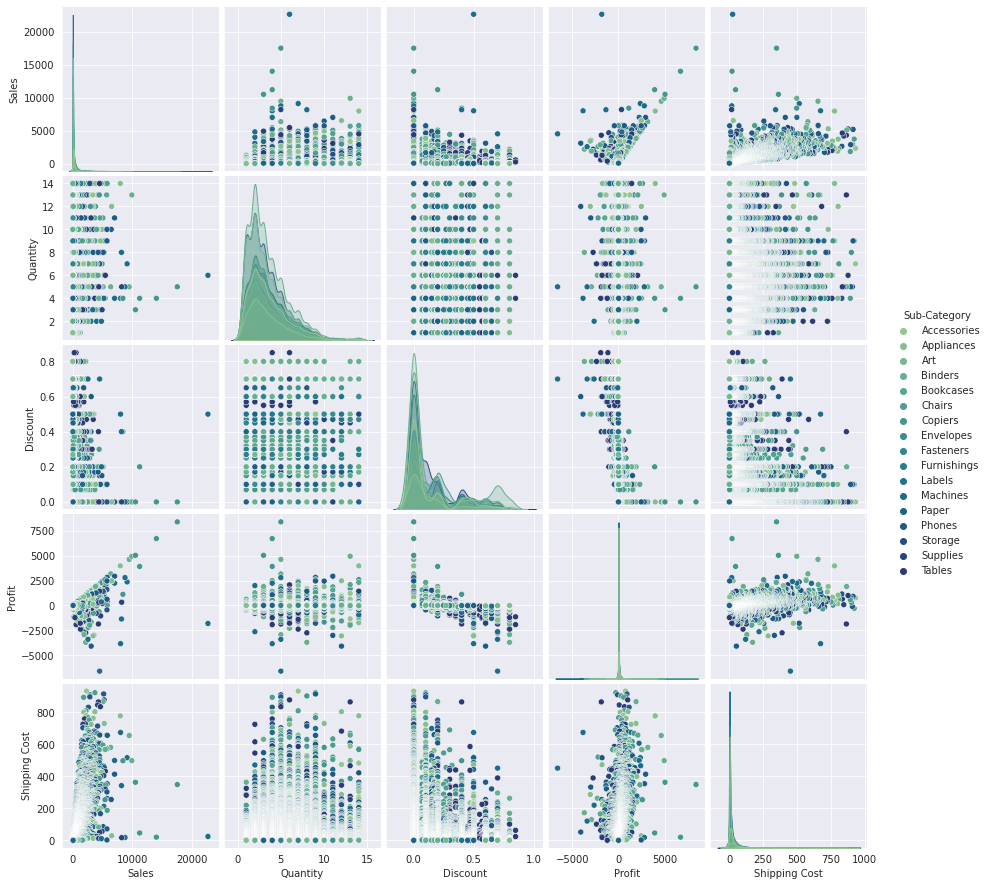

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(col, hue='Sub-Category', palette='crest')

**Feature Distibution :**

Melihat korelasi antar feature yang di breakdown berdasarkan Sub-Category.

* Dari plot di atas, kita dapat melihat bahwa kolom Sales memiliki korelasi positif dengan Profit berdasarkan Sub-Category nya, dimana ketika nilai Sales meningkat maka Profit yang didapatkan juga akan lebih besar. tetapi dapat dilihat juga ada beberapa Sub-Category produk yang memiliki nilai Sales besar tetapi Profitnya negatif.  

* Hal tersebut disebabkan karena Discount, Nilai Discount yang tinggi mengakibatkan Profit yang rendah.

## **Modelling**

In [ ]:
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df2 = df.copy()
df2 = df2.drop(columns=['Product ID', 'Shipping Time'], axis=1)
df2.head()

In [ ]:
df_cluster = df2.copy()
relevant_column = ['Customer ID','Order Date', 'Order ID', 'Sales', 'Profit']
df_cluster = df_cluster[(relevant_column)]
df_cluster.head()

,Customer ID,Order Date,Order ID,Sales,Profit
0,RH-19495,2012-07-31,CA-2012-124891,2309.650,762.1845
1,JR-16210,2013-02-05,IN-2013-77878,3709.395,-288.7650
2,CR-12730,2013-10-17,IN-2013-71249,5175.171,919.9710
3,KM-16375,2013-01-28,ES-2013-1579342,2892.510,-96.5400
4,RH-9495,2013-11-05,SG-2013-4320,2832.960,311.5200


In [ ]:
cluster.head()

,Recension,Total Orders,Spending Money,Generated Profits
Customer ID,,,,
AA-10315,8,42,13747.41300,447.69050
AA-10375,6,42,5884.19500,677.47740
AA-10480,125,38,17695.58978,1516.47518
AA-10645,28,73,15343.89070,3051.43900
AA-315,2,8,2243.25600,535.56600


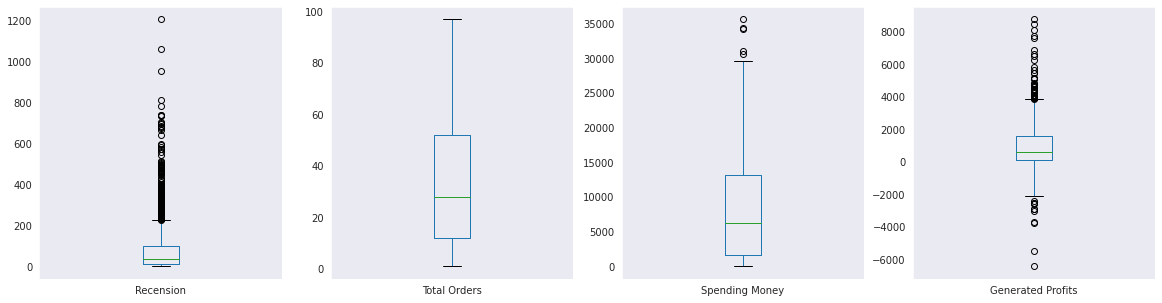

In [ ]:
cols = ['Recension',	'Total Orders',	'Spending Money',	'Generated Profits']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
for i, el in enumerate(cols):
    a = cluster.boxplot(el, ax=axes.flatten()[i], grid=False)
plt.show()

In [ ]:
Q1 = cluster[cols].quantile(0.05)
Q3 = cluster[cols].quantile(0.95)
IQR = Q3 - Q1
cluster_clean = cluster[~((cluster[cols] < (Q1 - 1.5 * IQR)) |(cluster[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()
cluster_outlier = cluster[((cluster[cols] < (Q1 - 1.5 * IQR)) |(cluster[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()

print("total row clean data :", len(cluster_clean))
print("total row outliers :", len(cluster_outlier))

total row clean data : 1587
total row outliers : 3


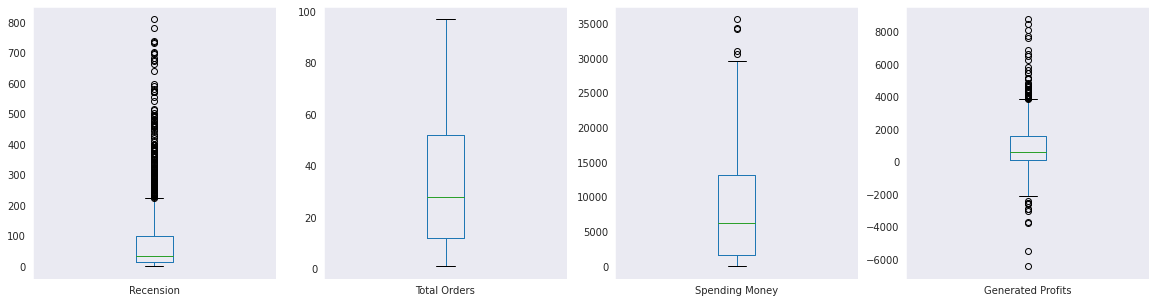

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
for i, el in enumerate(cols):
    a = cluster_clean.boxplot(el, ax=axes.flatten()[i], grid=False)
plt.show()

In [ ]:
cluster_scale = cluster_clean.copy()
scaler = MinMaxScaler()
cluster_scale[cols] = scaler.fit_transform(cluster_scale[cols])
cluster_scale

,Customer ID,Recension,Total Orders,Spending Money,Generated Profits
0,AA-10315,0.009864,0.427083,0.385302,0.452225
1,AA-10375,0.007398,0.427083,0.164803,0.467318
2,AA-10480,0.154131,0.385417,0.496016,0.522425
3,AA-10645,0.034525,0.750000,0.430070,0.623245
4,AA-315,0.002466,0.072917,0.062704,0.457997
...,...,...,...,...,...
1582,YS-21880,0.011097,0.552083,0.524283,0.625882
1583,ZC-11910,0.246609,0.000000,0.000000,0.421798
1584,ZC-21910,0.003699,0.864583,0.798230,0.452541
1585,ZD-11925,0.003699,0.177083,0.082557,0.454243


In [ ]:
# elbow
cluster_check = cluster_scale.copy()
cluster_check = cluster_scale.drop(['Customer ID'], axis=1)
cluster_check.head()

,Recension,Total Orders,Spending Money,Generated Profits
0,0.009864,0.427083,0.385302,0.452225
1,0.007398,0.427083,0.164803,0.467318
2,0.154131,0.385417,0.496016,0.522425
3,0.034525,0.750000,0.430070,0.623245
4,0.002466,0.072917,0.062704,0.457997


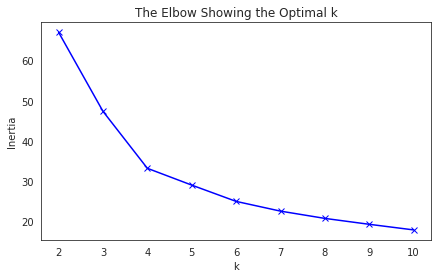

In [ ]:
distortions = []
K = range(2,11)
for k in K:
  kmeanModel = cluster.KMeans(n_clusters=k)
  kmeanModel.fit(cluster_check)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(7,4))
sns.set_style('white')
plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Showing the Optimal k')
plt.show()

### **Clustering Data**

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4, random_state = 2)
cluster_model.fit(cluster_check)
cluster_label = cluster_model.labels_
cluster_clean['Cluster'] = cluster_label
cluster_clean

,Customer ID,Recension,Total Orders,Spending Money,Generated Profits,Cluster
0,AA-10315,8,42,13747.41300,447.69050,0
1,AA-10375,6,42,5884.19500,677.47740,0
2,AA-10480,125,38,17695.58978,1516.47518,0
3,AA-10645,28,73,15343.89070,3051.43900,2
4,AA-315,2,8,2243.25600,535.56600,1
...,...,...,...,...,...,...
1582,YS-21880,9,54,18703.60600,3091.59430,2
1583,ZC-11910,200,1,7.17300,-15.56700,1
1584,ZC-21910,3,84,28472.81926,452.50326,2
1585,ZD-11925,3,18,2951.22600,478.41600,1


In [ ]:
cluster_clean.loc[(cluster_clean['Cluster'] == 2), 'Segmentation'] = 'Loyal Customers'
cluster_clean.loc[(cluster_clean['Cluster'] == 0), 'Segmentation'] = 'Potential Customers'
cluster_clean.loc[(cluster_clean['Cluster'] == 1), 'Segmentation'] = 'Promising Customers'
cluster_clean.loc[(cluster_clean['Cluster'] == 3), 'Segmentation'] = 'Lost Customers'

In [ ]:
cluster_clean.head()

,Customer ID,Recension,Total Orders,Spending Money,Generated Profits,Cluster,Segmentation
0,AA-10315,8,42,13747.41300,447.69050,0,Potential Customers
1,AA-10375,6,42,5884.19500,677.47740,0,Potential Customers
2,AA-10480,125,38,17695.58978,1516.47518,0,Potential Customers
3,AA-10645,28,73,15343.89070,3051.43900,2,Loyal Customers
4,AA-315,2,8,2243.25600,535.56600,1,Promising Customers


In [ ]:
cluster_clean.to_csv('data_cluster.csv')

In [ ]:
cluster_merge = pd.merge(cluster_clean[['Customer ID', 'Cluster', 'Segmentation']], df2, on='Customer ID')
cluster_merge

,Customer ID,Cluster,Segmentation,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Profit Margin %,Year,Month,Day,Year-Month
0,AA-10315,0,Potential Customers,CA-2013-103982,2013-03-04,2013-03-09,Standard Class,Alex Avila,Consumer,Round Rock,Texas,United States,US,Central,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,3930.072,3,0.2,-786.0144,253.20,Medium,-20.00,2013,3,4,2013-03
1,AA-10315,0,Potential Customers,ES-2012-2960821,2012-05-16,2012-05-21,Standard Class,Alex Avila,Consumer,Parla,Madrid,Spain,EU,South,Furniture,Bookcases,"Sauder Library with Doors, Traditional",2713.410,7,0.0,27.0900,167.35,Medium,1.00,2012,5,16,2012-05
2,AA-10315,0,Potential Customers,ES-2014-5334183,2014-08-04,2014-08-07,Second Class,Alex Avila,Consumer,Garforth,England,United Kingdom,EU,North,Technology,Phones,"Samsung Audio Dock, Full Size",504.360,3,0.0,65.5200,91.34,High,12.99,2014,8,4,2014-08
3,AA-10315,0,Potential Customers,ES-2014-5334183,2014-08-04,2014-08-07,Second Class,Alex Avila,Consumer,Garforth,England,United Kingdom,EU,North,Technology,Phones,"Nokia Speaker Phone, Full Size",622.200,5,0.0,124.3500,84.81,High,19.99,2014,8,4,2014-08
4,AA-10315,0,Potential Customers,ES-2014-5334183,2014-08-04,2014-08-07,Second Class,Alex Avila,Consumer,Garforth,England,United Kingdom,EU,North,Furniture,Bookcases,"Bush Floating Shelf Set, Metal",512.190,3,0.0,46.0800,62.19,High,9.00,2014,8,4,2014-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51265,ZD-21925,0,Potential Customers,IN-2011-73132,2011-09-20,2011-09-22,Second Class,Zuschuss Donatelli,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Office Supplies,Fasteners,"Stockwell Rubber Bands, Metal",59.940,4,0.1,11.9400,2.31,Medium,19.92,2011,9,20,2011-09
51266,ZD-21925,0,Potential Customers,US-2013-147991,2013-05-06,2013-05-10,Standard Class,Zuschuss Donatelli,Consumer,Chattanooga,Tennessee,United States,US,South,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.93,High,20.00,2013,5,6,2013-05
51267,ZD-21925,0,Potential Customers,ES-2012-4610139,2012-12-11,2012-12-16,Standard Class,Zuschuss Donatelli,Consumer,Viersen,North Rhine-Westphalia,Germany,EU,Central,Office Supplies,Fasteners,"Accos Rubber Bands, Metal",33.600,2,0.0,12.4200,1.67,Medium,36.96,2012,12,11,2012-12
51268,ZD-21925,0,Potential Customers,CA-2011-143336,2011-08-27,2011-09-01,Second Class,Zuschuss Donatelli,Consumer,San Francisco,California,United States,US,West,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,1.58,High,29.00,2011,8,27,2011-08


In [ ]:
cluster_merge.to_csv('data_final.csv')